In [12]:
import pandas as pd
import numpy as np
from scipy import linalg as la
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [13]:
N = 1000
x1 = np.random.normal(loc=-0., scale=1., size=(N,))
x2 = x1 + np.random.normal(loc=-0., scale=3., size=(N,))
x3 = 2*x1 + x2

d = {'x1': x1, 'x2': x2, 'x3': x3}
ds = pd.DataFrame(data=d)

data_matrix = pd.DataFrame(ds).to_numpy()

ds

,x1,x2,x3
0,0.373549,4.146491,4.893590
1,-1.157172,-4.444302,-6.758647
2,0.915988,-4.268380,-2.436405
3,0.459965,2.004275,2.924205
4,-0.933499,0.583572,-1.283425
...,...,...,...
995,-0.267791,0.097769,-0.437813
996,1.273530,-4.700109,-2.153048
997,1.551277,2.980616,6.083171
998,0.706309,0.808418,2.221036


In [14]:
# Computing of the covariance matrix

cov = np.cov(data_matrix.T)
print('Covariance matrix: \n', cov)

Covariance matrix: 
 [[ 1.01154408  0.94632839  2.96941654]
 [ 0.94632839  9.79144794 11.68410471]
 [ 2.96941654 11.68410471 17.6229378 ]]


In [15]:
# Diagonalization of the covariance matrix

l, V = la.eig(cov)
l = np.real_if_close(l)  # actually the eigenvalues we obtain in this case are already real numbers

l_ordered = np.flip(np.sort(l)) # to order the eigenvalues in desending order (as in the SVD case)    
V_ordered = V[:, np.flip(l.argsort())] # to permute the eigenvectors following the order of the eigenvalues

print("Eigenvalues of the covariance matrix sorted in descending order:\n", l_ordered, '\n')
print("Sorted eigenvectors of the covariance matrix:\n", V_ordered, '\n')

Eigenvalues of the covariance matrix sorted in descending order:
 [ 2.63766284e+01  2.04930144e+00 -2.31542439e-15] 

Sorted eigenvectors of the covariance matrix:
 [[-0.11619387  0.56553719 -0.81649658]
 [-0.57644491 -0.70784504 -0.40824829]
 [-0.80883265  0.42322935  0.40824829]] 



In [16]:
# Diagonalization of the dataset using the SVD method

U, S, Vt = np.linalg.svd(data_matrix.T) # SVD decomposition on the dataset

l_svd = S**2/(N-1) # Rescaling of the SVD spectrum to get the eigenvalues
V_svd = U # Matrix containing the eigenvectors

print("Eigenvalues obtained with the SVD method:\n", l_svd, '\n')
print("Eigenvectors obtained with the SVD method:\n", V_svd, '\n')


Eigenvalues obtained with the SVD method:
 [2.64144137e+01 2.04962546e+00 6.52297415e-32] 

Eigenvectors obtained with the SVD method:
 [[-0.11611259  0.56555389 -0.81649658]
 [-0.57654664 -0.70776218 -0.40824829]
 [-0.80877181  0.42334559  0.40824829]] 



In [17]:
print("Are the V and V_svd matrices equal?", np.allclose(V_ordered, V_svd, rtol=5e-03))
print('The two eigenvectors matrix are equal with a relative error of 0.5%')
print("Are the l and l_svd eigenvalues equal?", np.allclose(l_ordered, l_svd, rtol=5e-03))
print('Also the relative error between the eigenvalues is of 0.5%')

Are the V and V_svd matrices equal? True
The two eigenvectors matrix are equal with a relative error of 0.5%
Are the l and l_svd eigenvalues equal? True
Also the relative error between the eigenvalues is of 0.5%


In [18]:
# Percentage of explained variability
# The eigenvalues set the ammount of variance contained in each principal component

tot_variance = np.sum(l_ordered)

percent_var = np.empty(len(l_ordered))
for i in range(len(l_ordered)):
    percent_var[i] = l_ordered[i]/tot_variance
    if percent_var[i] < 0:
        percent_var[i] = 0
    
# print(percent_var)

print('The first principal component contains', percent_var[0]*100,'% of the explained variability')
print('The second principal component contains', percent_var[1]*100,'% of the explained variability')
print('The third principal component contains', percent_var[2]*100,'% of the explained variability')

print('The total variability contained in the first and second principal components is', (percent_var[0]+percent_var[1])*100, '%')
print('We can therefore reduce to 2 the dimensionality of the system with no loss of information')


The first principal component contains 92.79073207115528 % of the explained variability
The second principal component contains 7.209267928844731 % of the explained variability
The third principal component contains 0.0 % of the explained variability
The total variability contained in the first and second principal components is 100.0 %
We can therefore reduce to 2 the dimensionality of the system with no loss of information


In [19]:
print('To reduce the dimensionality of the system we keep only the first and the second principal components, namely we keep only the first two columns of the V matrix \n')

feature_V = V_ordered[:, [0,1]]
feature_l = l_ordered[0:2]

print(feature_l)
print(feature_V)

To reduce the dimensionality of the system we keep only the first and the second principal components, namely we keep only the first two columns of the V matrix 

[26.37662837  2.04930144]
[[-0.11619387  0.56553719]
 [-0.57644491 -0.70784504]
 [-0.80883265  0.42322935]]


Eigenvalue: 26.37662837361811 ,	eigenvector: [-0.06708456 -0.33281063 -0.46697975]
Eigenvalue: 2.0493014416478834 ,	eigenvector: [ 0.32651305 -0.40867452  0.24435158]
Eigenvalue: -2.315424389238309e-15 ,	eigenvector: [-0.47140452 -0.23570226  0.23570226]


Text(0, 0.5, 'feature 3')

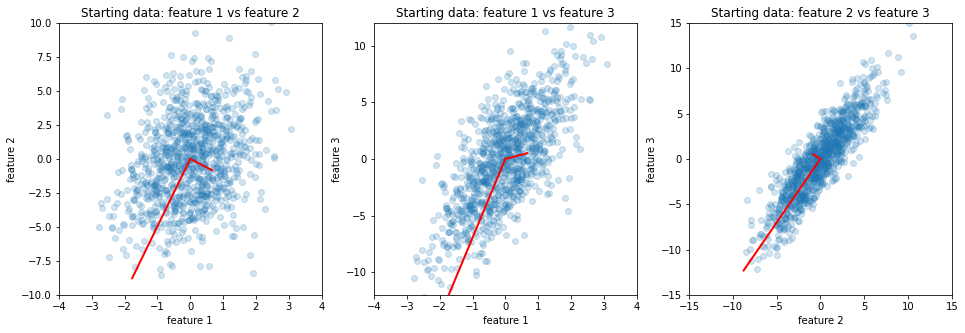

In [24]:
fig, (ax12, ax13, ax23) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
ax12.scatter(data_matrix.T[0,:], data_matrix.T[1,:], alpha=0.2)
ax13.scatter(data_matrix.T[0,:], data_matrix.T[2,:], alpha=0.2)
ax23.scatter(data_matrix.T[1,:], data_matrix.T[2,:], alpha=0.2)

scale_factor = 1

norm = np.linalg.norm(V_ordered)
V_ordered = V_ordered/norm

for li, vi in zip(l_ordered/norm, V_ordered.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax12.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    ax13.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    ax23.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    
ax12.axis([-4, 4, -10, 10])
ax13.axis([-4, 4, -12, 12])
ax23.axis([-15, 15, -15, 15])

ax12.set_title('Starting data: feature 1 vs feature 2')
ax12.set_xlabel('feature 1')
ax12.set_ylabel('feature 2')

ax13.set_title('Starting data: feature 1 vs feature 3')
ax13.set_xlabel('feature 1')
ax13.set_ylabel('feature 3')

ax23.set_title('Starting data: feature 2 vs feature 3')
ax23.set_xlabel('feature 2')
ax23.set_ylabel('feature 3')

Eigenvalue: 26.37662837361811 ,	eigenvector: [3.33333333e-01 1.08374796e-16 2.52563088e-16]
Eigenvalue: 2.0493014416478834 ,	eigenvector: [ 1.08374796e-16  3.33333333e-01 -4.91223396e-16]
Eigenvalue: -2.315424389238309e-15 ,	eigenvector: [ 2.52563088e-16 -4.91223396e-16  3.33333333e-01]


Text(0, 0.5, 'feature 3')

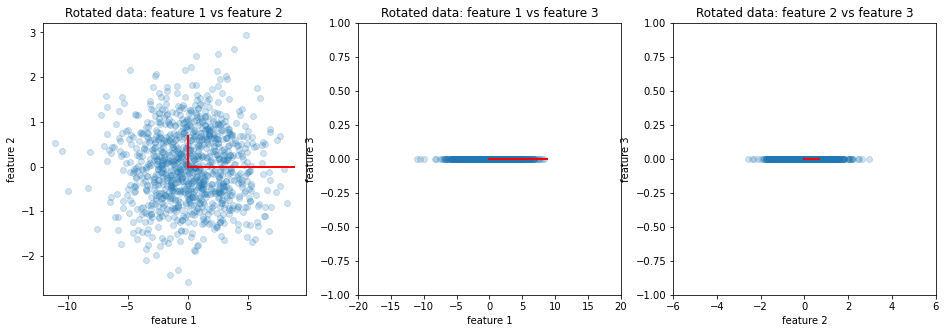

In [25]:
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
Xp = np.dot(V_ordered.T, data_matrix.T)

# then plot the rotated dataset and its "axes"
fig, (ax12, ax13, ax23) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
ax12.scatter(Xp[0,:], Xp[1,:], alpha=0.2)
ax13.scatter(Xp[0,:], Xp[2,:], alpha=0.2)
ax23.scatter(Xp[1,:], Xp[2,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l_ordered/norm, np.dot(V_ordered.T, V_ordered)): # np.dot(V.T, V) is equivalent to np.diag([1]*len(l))
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    ax12.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    ax13.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    ax23.plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)

ax13.axis([-20, 20, -1, 1])
ax23.axis([-6, 6, -1, 1])

ax12.set_title('Rotated data: feature 1 vs feature 2')
ax12.set_xlabel('feature 1')
ax12.set_ylabel('feature 2')

ax13.set_title('Rotated data: feature 1 vs feature 3')
ax13.set_xlabel('feature 1')
ax13.set_ylabel('feature 3')

ax23.set_title('Rotated data: feature 2 vs feature 3')
ax23.set_xlabel('feature 2')
ax23.set_ylabel('feature 3')

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [26]:
N = 1000
x1 = np.random.normal(loc=-0., scale=1., size=(N,))
x2 = x1 + np.random.normal(loc=-0., scale=3., size=(N,))
x3 = 2*x1 + x2

datas = np.vstack([x1, x2])
datas = np.vstack([datas, x3])

for i in range(10):
    random = np.random.normal(loc=-0., scale=1/20, size=(N,))  # generation of the random variables as noise
    datas = np.vstack([datas, random])

ds = pd.DataFrame(datas.T, columns=['x1', 'x2', 'x3', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10'])

data_matrix = pd.DataFrame(ds).to_numpy()

ds

,x1,x2,x3,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10
0,1.063355,6.038727,8.165438,-0.051081,0.047921,0.047112,0.050324,-0.051041,-0.073473,0.033257,0.020325,0.050218,0.038726
1,1.894742,-0.099781,3.689702,0.040490,-0.072528,0.056239,-0.057073,0.067661,0.011128,0.075020,0.018902,-0.107801,-0.018695
2,0.992038,3.844242,5.828319,0.008835,0.038985,-0.031894,-0.002536,-0.051681,0.040930,0.008788,-0.009235,0.005356,-0.015510
3,1.962439,2.978063,6.902941,0.053518,-0.018526,0.040268,0.004187,0.084668,0.027973,0.023706,-0.005269,-0.021386,0.041133
4,-0.678810,2.581798,1.224179,0.017505,0.019242,-0.105916,0.000380,0.054617,0.024450,-0.091079,0.003177,0.029609,0.045643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.351179,3.234998,3.937357,-0.077750,-0.018507,0.086128,0.014794,0.011609,0.020524,-0.046930,-0.028674,0.059825,-0.038297
996,0.715408,-4.096399,-2.665584,0.067722,0.017032,-0.012590,0.016430,0.004308,0.044090,-0.080604,-0.033401,0.021227,-0.090188
997,-0.095156,3.069115,2.878803,-0.045827,-0.025529,0.004142,0.049173,-0.053400,0.021296,-0.023140,0.033486,0.023361,-0.060570
998,0.241747,2.067846,2.551340,0.026265,-0.028092,-0.021056,-0.053879,-0.054472,-0.085074,0.026553,-0.048534,-0.005673,-0.026839


In [27]:
# Diagonalization of the covariance matrix

cov = np.cov(data_matrix.T) # computing of the covariance matrix

l, V = la.eig(cov) # computing of eigenvalues and eigenvectors
l = np.real_if_close(l)  # actually the eigenvalues we obtain in this case are already real numbers

l_ordered = np.flip(np.sort(l)) # to order the eigenvalues in desending order (as in the SVD case)    
V_ordered = V[:, np.flip(l.argsort())] # to permute the eigenvectors following the order of the eigenvalues

print("Eigenvalues of the covariance matrix sorted in descending order:\n", l_ordered, '\n')
#print("Sorted eigenvectors of the covariance matrix:\n", V_ordered, '\n')


Eigenvalues of the covariance matrix sorted in descending order:
 [2.62156548e+01 1.83375745e+00 2.88616812e-03 2.72270742e-03
 2.64024625e-03 2.57381316e-03 2.54771039e-03 2.48978706e-03
 2.31028935e-03 2.28724462e-03 2.19429035e-03 2.02299116e-03
 9.07470248e-16] 



In [28]:
# Percentage of explained variability
# The eigenvalues set the ammount of variance contained in each principal component

tot_variance = np.sum(l_ordered)

percent_var = np.empty(len(l_ordered))
for i in range(len(l_ordered)):
    percent_var[i] = l_ordered[i]/tot_variance
    if percent_var[i] < 0:
        percent_var[i] = 0
    
#print(np.sum(percent_var))

print('The first principal component contains', percent_var[0]*100,'% of the explained variability')
print('The second principal component contains', percent_var[1]*100,'% of the explained variability')
print('The third principal component contains', percent_var[2]*100,'% of the explained variability')

The first principal component contains 93.38025607960863 % of the explained variability
The second principal component contains 6.531850599252562 % of the explained variability
The third principal component contains 0.010280541172031369 % of the explained variability


Text(0, 0.5, 'feature 3')

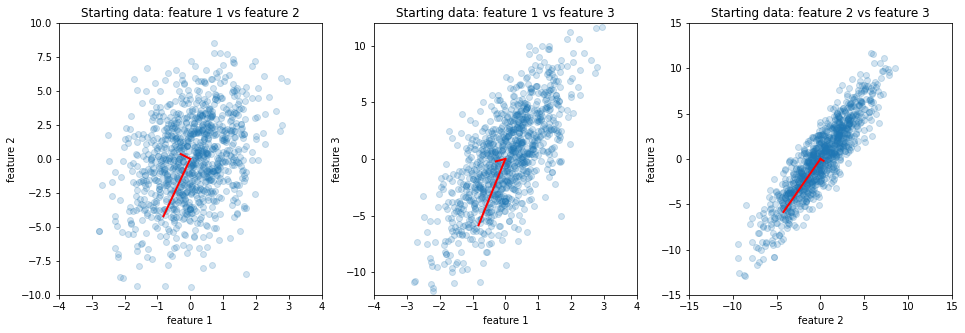

In [29]:
fig, (ax12, ax13, ax23) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
ax12.scatter(data_matrix.T[0,:], data_matrix.T[1,:], alpha=0.2)
ax13.scatter(data_matrix.T[0,:], data_matrix.T[2,:], alpha=0.2)
ax23.scatter(data_matrix.T[1,:], data_matrix.T[2,:], alpha=0.2)

scale_factor = 1
norm = np.linalg.norm(V_ordered)
V_ordered = V_ordered/norm

for li, vi in zip(l_ordered, V_ordered.T):
    #print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax12.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    ax13.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    ax23.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    
ax12.axis([-4, 4, -10, 10])
ax13.axis([-4, 4, -12, 12])
ax23.axis([-15, 15, -15, 15])

ax12.set_title('Starting data: feature 1 vs feature 2')
ax12.set_xlabel('feature 1')
ax12.set_ylabel('feature 2')

ax13.set_title('Starting data: feature 1 vs feature 3')
ax13.set_xlabel('feature 1')
ax13.set_ylabel('feature 3')

ax23.set_title('Starting data: feature 2 vs feature 3')
ax23.set_xlabel('feature 2')
ax23.set_ylabel('feature 3')

Text(0, 0.5, 'feature 3')

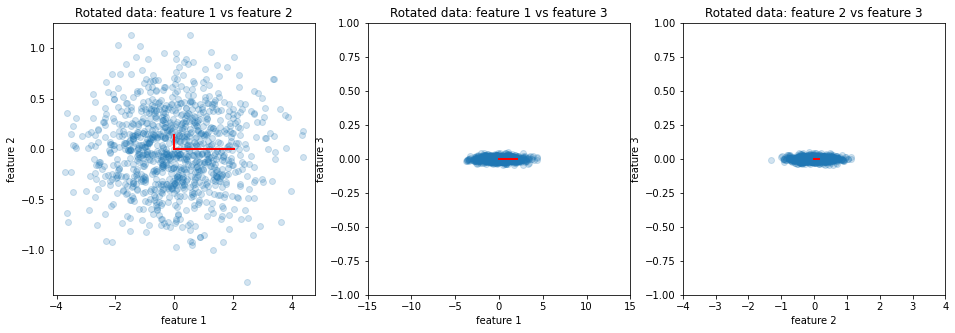

In [30]:
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
Xp = np.dot(V_ordered.T, data_matrix.T)

# then plot the rotated dataset and its "axes"
fig, (ax12, ax13, ax23) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
ax12.scatter(Xp[0,:], Xp[1,:], alpha=0.2)
ax13.scatter(Xp[0,:], Xp[2,:], alpha=0.2)
ax23.scatter(Xp[1,:], Xp[2,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data

norm = np.linalg.norm(V_ordered)
V_ordered = V_ordered/norm

for li, vi in zip(l_ordered, np.dot(V_ordered.T, V_ordered)): # np.dot(V.T, V) is equivalent to np.diag([1]*len(l))
    #print("Eigenvalue:", li, ",\teigenvector:", vi)
    ax12.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    ax13.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    ax23.plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    


ax13.axis([-15, 15, -1, 1])
ax23.axis([-4, 4, -1, 1])

ax12.set_title('Rotated data: feature 1 vs feature 2')
ax12.set_xlabel('feature 1')
ax12.set_ylabel('feature 2')

ax13.set_title('Rotated data: feature 1 vs feature 3')
ax13.set_xlabel('feature 1')
ax13.set_ylabel('feature 3')

ax23.set_title('Rotated data: feature 2 vs feature 3')
ax23.set_xlabel('feature 2')
ax23.set_ylabel('feature 3')

In [31]:
print('In this second case the uncorrelated noise that we have added has an explained variability higher then the third feature x3, therefore I am actually plotting one of the noise')

In this second case the uncorrelated noise that we have added has an explained variability higher then the third feature x3, therefore I am actually plotting one of the noise


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [18]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 